<a href="https://colab.research.google.com/github/Keita062/soccer/blob/main/(10.28)firist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 読み込むCSVファイルのパスをリスト化
file_paths = [
    "/content/1992.csv", "/content/1993.csv", "/content/1994.csv", "/content/1995.csv",
    "/content/1996.csv", "/content/1997.csv", "/content/1998.csv", "/content/1999.csv",
    "/content/2000.csv", "/content/2001.csv", "/content/2002.csv", "/content/2003.csv",
    "/content/2004.csv", "/content/2005.csv", "/content/2006.csv", "/content/2007.csv",
    "/content/2008.csv", "/content/2009.csv", "/content/2010.csv", "/content/2011.csv",
    "/content/2012.csv", "/content/2013.csv", "/content/2014.csv", "/content/2015.csv",
    "/content/2017.csv", "/content/2018.csv", "/content/2019.csv", "/content/2020.csv"
]

# 各CSVファイルをDataFrameとして読み込み、リストに格納
data_frames = [pd.read_csv(file) for file in file_paths]

# すべてのDataFrameを縦方向に結合
total_premia_data  = pd.concat(data_frames, ignore_index=True)

# データ確認
total_premia_data


,Round,Date,Team 1,FT,Team 2
0,1,Sat Aug 15 1992,Arsenal FC,2-4,Norwich City FC
1,1,Sat Aug 15 1992,Leeds United FC,2-1,Wimbledon FC
2,1,Sat Aug 15 1992,Coventry City FC,2-1,Middlesbrough FC
3,1,Sat Aug 15 1992,Ipswich Town FC,1-1,Aston Villa FC
4,1,Sat Aug 15 1992,Crystal Palace FC,3-3,Blackburn Rovers FC
...,...,...,...,...,...
10881,38,Sun May 23 2021,West Ham,3–0,Southampton
10882,38,Sun May 23 2021,Leeds United,3–1,West Brom
10883,38,Sun May 23 2021,Arsenal,2–0,Brighton
10884,38,Sun May 23 2021,Liverpool,2–0,Crystal Palace


In [45]:
print(total_premia_data.info())
print(total_premia_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Round   10886 non-null  int64 
 1   Date    10886 non-null  object
 2   Team 1  10886 non-null  object
 3   FT      10886 non-null  object
 4   Team 2  10886 non-null  object
dtypes: int64(1), object(4)
memory usage: 425.4+ KB
None
              Round
count  10886.000000
mean      19.754639
std       11.140064
min        1.000000
25%       10.000000
50%       20.000000
75%       29.000000
max       42.000000


In [46]:
# 元のチーム名の配列
teams = np.array([
    'Manchester United FC', 'Arsenal FC', 'Chelsea FC', 'Liverpool FC',
    'Tottenham Hotspur FC', 'Everton FC', 'Manchester City FC',
    'Newcastle United FC', 'Aston Villa FC', 'West Ham United FC',
    'Blackburn Rovers FC', 'Southampton FC', 'Leeds United FC',
    'Middlesbrough FC', 'Leicester City FC', 'Fulham FC',
    'Sunderland AFC', 'Bolton Wanderers FC', 'Crystal Palace FC',
    'West Bromwich Albion FC', 'Stoke City FC', 'Coventry City FC',
    'Sheffield Wednesday FC', 'Wimbledon FC', 'Norwich City FC',
    'Charlton Athletic FC', 'Wigan Athletic FC',
    'Queens Park Rangers FC', 'Portsmouth FC', 'Birmingham City FC',
    'Derby County FC', 'Swansea City FC', 'Wolverhampton Wanderers FC',
    'Nottingham Forest FC', 'Ipswich Town FC', 'Watford FC',
    'Burnley FC', 'Sheffield United FC', 'AFC Bournemouth',
    'Hull City AFC', 'Reading FC', 'Brighton & Hove Albion FC',
    'Oldham Athletic AFC', 'Cardiff City FC', 'Bradford City AFC',
    'Huddersfield Town AFC', 'Blackpool FC', 'Tottenham', 'West Brom',
    'West Ham', 'Southampton', 'Liverpool', 'Sheffield Utd',
    'Newcastle Utd', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
    'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
    'Leicester City', 'Arsenal', 'Manchester City', 'Manchester Utd',
    'Wolves', 'Barnsley FC', 'Swindon Town FC'
])

# チーム名の標準化を行う辞書
team_name_mapping = {
    'Manchester United FC': 'Manchester United',
    'Manchester Utd': 'Manchester United',
    'Arsenal FC': 'Arsenal',
    'Arsenal': 'Arsenal',
    'Chelsea FC': 'Chelsea',
    'Chelsea': 'Chelsea',
    'Liverpool FC': 'Liverpool',
    'Liverpool': 'Liverpool',
    'Tottenham Hotspur FC': 'Tottenham Hotspur',
    'Tottenham': 'Tottenham Hotspur',
    'Everton FC': 'Everton',
    'Everton': 'Everton',
    'Manchester City FC': 'Manchester City',
    'Manchester City': 'Manchester City',
    'Newcastle United FC': 'Newcastle United',
    'Newcastle Utd': 'Newcastle United',
    'Aston Villa FC': 'Aston Villa',
    'Aston Villa': 'Aston Villa',
    'West Ham United FC': 'West Ham United',
    'West Ham': 'West Ham United',
    'Southampton FC': 'Southampton',
    'Southampton': 'Southampton',
    'Fulham FC': 'Fulham',
    'Fulham': 'Fulham',
    'Leeds United FC': 'Leeds United',
    'Leeds United': 'Leeds United',
    'Leicester City FC': 'Leicester City',
    'Leicester City': 'Leicester City',
    'Brighton & Hove Albion FC': 'Brighton',
    'Brighton': 'Brighton',
    'Burnley FC': 'Burnley',
    'Burnley': 'Burnley',
    'Wolverhampton Wanderers FC': 'Wolves',
    'Wolves': 'Wolves',
    # 追加のチーム名のマッピングをここに追加できます
}

# チーム名を標準化する
standardized_teams = np.array([team_name_mapping.get(team, team) for team in teams])

# 結果を表示
unique_teams = np.unique(standardized_teams)

In [47]:
total_premia_data['Team 1'] = total_premia_data['Team 1'].map(team_name_mapping).fillna(total_premia_data['Team 1'])
total_premia_data['Team 2'] = total_premia_data['Team 2'].map(team_name_mapping).fillna(total_premia_data['Team 2'])
total_premia_data.head()

,Round,Date,Team 1,FT,Team 2
0,1,Sat Aug 15 1992,Arsenal,2-4,Norwich City FC
1,1,Sat Aug 15 1992,Leeds United,2-1,Wimbledon FC
2,1,Sat Aug 15 1992,Coventry City FC,2-1,Middlesbrough FC
3,1,Sat Aug 15 1992,Ipswich Town FC,1-1,Aston Villa
4,1,Sat Aug 15 1992,Crystal Palace FC,3-3,Blackburn Rovers FC


In [48]:
# Date列を曜日, 月, 日, 年に分割 (例: 'Sat Oct 14 2020')
total_premia_data[['Weekday', 'Month', 'Day', 'Year']] = total_premia_data['Date'].str.split(' ', expand=True)

# Day列を整数型に変換
total_premia_data['Day'] = pd.to_numeric(total_premia_data['Day'], errors='coerce')

# FT列(スコア)を分割 (例: '2-4' → 'Team1_Score' と 'Team2_Score')
total_premia_data[['Team1_Score', 'Team2_Score']] = total_premia_data['FT'].str.split('-', expand=True)

# スコア列を整数型に変換
total_premia_data['Team1_Score'] = pd.to_numeric(total_premia_data['Team1_Score'], errors='coerce')
total_premia_data['Team2_Score'] = pd.to_numeric(total_premia_data['Team2_Score'], errors='coerce')

# データ確認
total_premia_data.head()

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score
0,1,Sat Aug 15 1992,Arsenal,2-4,Norwich City FC,Sat,Aug,15,1992,2.0,4.0
1,1,Sat Aug 15 1992,Leeds United,2-1,Wimbledon FC,Sat,Aug,15,1992,2.0,1.0
2,1,Sat Aug 15 1992,Coventry City FC,2-1,Middlesbrough FC,Sat,Aug,15,1992,2.0,1.0
3,1,Sat Aug 15 1992,Ipswich Town FC,1-1,Aston Villa,Sat,Aug,15,1992,1.0,1.0
4,1,Sat Aug 15 1992,Crystal Palace FC,3-3,Blackburn Rovers FC,Sat,Aug,15,1992,3.0,3.0


In [49]:
# 1. チームごとの勝敗・得失点などのデータを初期化する
teams_stats = []

# 2. 各試合の結果をもとに、勝敗や得点を集計
for _, row in total_premia_data.iterrows():
    team1, team2 = row['Team 1'], row['Team 2']
    score1, score2 = row['Team1_Score'], row['Team2_Score']

    # 勝敗の判定
    if score1 > score2:
        result1, result2 = 'win', 'loss'
    elif score1 < score2:
        result1, result2 = 'loss', 'win'
    else:
        result1, result2 = 'draw', 'draw'

    # 各チームの試合結果をリストに格納
    teams_stats.extend([
        {'Team': team1, 'Result': result1, 'GoalsScored': score1, 'GoalsConceded': score2},
        {'Team': team2, 'Result': result2, 'GoalsScored': score2, 'GoalsConceded': score1}
    ])

# 3. DataFrameに変換
df_stats = pd.DataFrame(teams_stats)

# 4. 集計処理
summary = df_stats.groupby(['Team']).agg(
    Matches=('Result', 'count'),
    Wins=('Result', lambda x: (x == 'win').sum()),
    Draws=('Result', lambda x: (x == 'draw').sum()),
    Losses=('Result', lambda x: (x == 'loss').sum()),
    GoalsScored=('GoalsScored', 'sum'),
    GoalsConceded=('GoalsConceded', 'sum')
).reset_index()

# 5. 得失点差と勝点を計算
summary['GoalDifference'] = summary['GoalsScored'] - summary['GoalsConceded']
summary['Points'] = summary['Wins'] * 3 + summary['Draws']

# 6. データフレームを表示
summary

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
0,AFC Bournemouth,152,44,33,75,186.0,263.0,-77.0,165
1,Arsenal,1076,556,306,214,1824.0,1017.0,807.0,1974
2,Aston Villa,1000,325,321,354,1158.0,1253.0,-95.0,1296
3,Barnsley FC,38,10,5,23,37.0,82.0,-45.0,35
4,Birmingham City FC,266,73,82,111,273.0,360.0,-87.0,301
5,Blackburn Rovers FC,696,262,184,250,927.0,907.0,20.0,970
6,Blackpool FC,38,10,9,19,55.0,78.0,-23.0,39
7,Bolton Wanderers FC,494,149,128,217,575.0,745.0,-170.0,575
8,Bradford City AFC,76,14,20,42,68.0,138.0,-70.0,62
9,Brighton,152,27,74,51,108.0,168.0,-60.0,155


In [50]:
summary_sort=summary.sort_values(by='Matches',ascending=False)
summary_sort

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
27,Manchester United,1076,648,259,169,2001.0,936.0,1065.0,2203
1,Arsenal,1076,556,306,214,1824.0,1017.0,807.0,1974
25,Liverpool,1076,539,293,244,1781.0,1037.0,744.0,1910
44,Tottenham Hotspur,1076,436,298,342,1522.0,1327.0,195.0,1606
18,Everton,1076,373,334,369,1339.0,1323.0,16.0,1453
13,Chelsea,1076,548,298,230,1754.0,1023.0,731.0,1942
2,Aston Villa,1000,325,321,354,1158.0,1253.0,-95.0,1296
29,Newcastle United,996,357,283,356,1287.0,1293.0,-6.0,1354
48,West Ham United,920,288,266,366,1066.0,1267.0,-201.0,1130
26,Manchester City,886,394,228,264,1396.0,971.0,425.0,1410


In [51]:
match_sorted_data = summary.sort_values(by=['Matches', 'Points'], ascending=[False, False])
match_sorted_data

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
27,Manchester United,1076,648,259,169,2001.0,936.0,1065.0,2203
1,Arsenal,1076,556,306,214,1824.0,1017.0,807.0,1974
13,Chelsea,1076,548,298,230,1754.0,1023.0,731.0,1942
25,Liverpool,1076,539,293,244,1781.0,1037.0,744.0,1910
44,Tottenham Hotspur,1076,436,298,342,1522.0,1327.0,195.0,1606
18,Everton,1076,373,334,369,1339.0,1323.0,16.0,1453
2,Aston Villa,1000,325,321,354,1158.0,1253.0,-95.0,1296
29,Newcastle United,996,357,283,356,1287.0,1293.0,-6.0,1354
48,West Ham United,920,288,266,366,1066.0,1267.0,-201.0,1130
26,Manchester City,886,394,228,264,1396.0,971.0,425.0,1410


In [52]:
summary['Team'].unique()

array(['AFC Bournemouth', 'Arsenal', 'Aston Villa', 'Barnsley FC',
       'Birmingham City FC', 'Blackburn Rovers FC', 'Blackpool FC',
       'Bolton Wanderers FC', 'Bradford City AFC', 'Brighton', 'Burnley',
       'Cardiff City FC', 'Charlton Athletic FC', 'Chelsea',
       'Coventry City FC', 'Crystal Palace', 'Crystal Palace FC',
       'Derby County FC', 'Everton', 'Fulham', 'Huddersfield Town AFC',
       'Hull City AFC', 'Ipswich Town FC', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City',
       'Manchester United', 'Middlesbrough FC', 'Newcastle United',
       'Norwich City FC', 'Nottingham Forest FC', 'Oldham Athletic AFC',
       'Portsmouth FC', 'Queens Park Rangers FC', 'Reading FC',
       'Sheffield United FC', 'Sheffield Utd', 'Sheffield Wednesday FC',
       'Southampton', 'Stoke City FC', 'Sunderland AFC',
       'Swansea City FC', 'Swindon Town FC', 'Tottenham Hotspur',
       'Watford FC', 'West Brom', 'West Bromwich Albion FC',
       'West H

In [53]:
# ビッグ6クラブのリスト
big6_teams  = ["Manchester United", "Liverpool", "Chelsea", "Arsenal", "Manchester City", "Tottenham Hotspur"]
big6_data = summary[summary['Team'].isin(big6_teams)]
big6_data

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points
1,Arsenal,1076,556,306,214,1824.0,1017.0,807.0,1974
13,Chelsea,1076,548,298,230,1754.0,1023.0,731.0,1942
25,Liverpool,1076,539,293,244,1781.0,1037.0,744.0,1910
26,Manchester City,886,394,228,264,1396.0,971.0,425.0,1410
27,Manchester United,1076,648,259,169,2001.0,936.0,1065.0,2203
44,Tottenham Hotspur,1076,436,298,342,1522.0,1327.0,195.0,1606


In [54]:
# ビッグ6同士の試合を抽出
big6_matches = total_premia_data[
    (total_premia_data['Team 1'].isin(big6_teams)) &
    (total_premia_data['Team 2'].isin(big6_teams))
]

# 各チームの成績を集計するための辞書を初期化 (勝ち、負け、試合数、引き分け)
results = {team: {opponent: {'wins': 0, 'losses': 0, 'draws': 0, 'games': 0}
                  for opponent in big6_teams}
           for team in big6_teams}

# 勝利チームと引き分けの判定
for _, row in big6_matches.iterrows():
    team1, team2 = row['Team 1'], row['Team 2']
    score1, score2 = row['Team1_Score'], row['Team2_Score']

    # 対戦回数をカウント
    results[team1][team2]['games'] += 1
    results[team2][team1]['games'] += 1

    if score1 > score2:
        # team1が勝ち、team2が負け
        results[team1][team2]['wins'] += 1
        results[team2][team1]['losses'] += 1
    elif score2 > score1:
        # team2が勝ち、team1が負け
        results[team2][team1]['wins'] += 1
        results[team1][team2]['losses'] += 1
    else:
        # 引き分けの場合
        results[team1][team2]['draws'] += 1
        results[team2][team1]['draws'] += 1

# 勝ち、負け、引き分けの表を作成する関数
def create_league_table(results, stat):
    table = pd.DataFrame(index=big6_teams, columns=big6_teams)
    for team1 in big6_teams:
        for team2 in big6_teams:
            if team1 != team2:
                value = results[team1][team2][stat]
                games = results[team1][team2]['games']
                table.at[team1, team2] = f"{value} ({games})"
            else:
                table.at[team1, team2] = "-"
    return table

# 各成績表の作成
win_table = create_league_table(results, 'wins')
loss_table = create_league_table(results, 'losses')
draw_table = create_league_table(results, 'draws')

In [55]:
# 各リーグ戦表の表示
print("\n勝ち数リーグ表 (勝ち数(試合数)):")
win_table


勝ち数リーグ表 (勝ち数(試合数)):


,Manchester United,Liverpool,Chelsea,Arsenal,Manchester City,Tottenham Hotspur
Manchester United,-,28 (56),16 (56),24 (56),23 (46),34 (56)
Liverpool,15 (56),-,21 (56),19 (56),19 (46),26 (56)
Chelsea,17 (56),20 (56),-,18 (56),24 (46),29 (56)
Arsenal,14 (56),16 (56),19 (56),-,23 (46),20 (56)
Manchester City,14 (46),10 (46),13 (46),12 (46),-,15 (46)
Tottenham Hotspur,8 (56),14 (56),6 (56),12 (56),23 (46),-


In [56]:
print("\n負け数リーグ表 (負け数(試合数)):")
loss_table


負け数リーグ表 (負け数(試合数)):


,Manchester United,Liverpool,Chelsea,Arsenal,Manchester City,Tottenham Hotspur
Manchester United,-,15 (56),17 (56),14 (56),14 (46),8 (56)
Liverpool,28 (56),-,20 (56),16 (56),10 (46),14 (56)
Chelsea,16 (56),21 (56),-,19 (56),13 (46),6 (56)
Arsenal,24 (56),19 (56),18 (56),-,12 (46),12 (56)
Manchester City,23 (46),19 (46),24 (46),23 (46),-,23 (46)
Tottenham Hotspur,34 (56),26 (56),29 (56),20 (56),15 (46),-


In [57]:
print("\n引き分け数リーグ表 (引き分け数(試合数)):")
draw_table


引き分け数リーグ表 (引き分け数(試合数)):


,Manchester United,Liverpool,Chelsea,Arsenal,Manchester City,Tottenham Hotspur
Manchester United,-,13 (56),23 (56),18 (56),9 (46),14 (56)
Liverpool,13 (56),-,15 (56),21 (56),17 (46),16 (56)
Chelsea,23 (56),15 (56),-,19 (56),9 (46),21 (56)
Arsenal,18 (56),21 (56),19 (56),-,11 (46),24 (56)
Manchester City,9 (46),17 (46),9 (46),11 (46),-,8 (46)
Tottenham Hotspur,14 (56),16 (56),21 (56),24 (56),8 (46),-


In [58]:
# Calculating win, loss, and draw rates based on the 'summary' DataFrame.
big6_data['Win_Rate'] = big6_data['Wins'] / big6_data['Matches'] * 100
big6_data['Loss_Rate'] = big6_data['Losses'] / big6_data['Matches'] * 100
big6_data['Draw_Rate'] = big6_data['Draws'] / big6_data['Matches'] * 100

# Displaying the calculated rates for inspection
summary_rates = big6_data[['Team', 'Win_Rate', 'Loss_Rate', 'Draw_Rate']]
summary_rates

<ipython-input-58-638c9a1f6ee1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6_data['Win_Rate'] = big6_data['Wins'] / big6_data['Matches'] * 100
<ipython-input-58-638c9a1f6ee1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6_data['Loss_Rate'] = big6_data['Losses'] / big6_data['Matches'] * 100
<ipython-input-58-638c9a1f6ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Team,Win_Rate,Loss_Rate,Draw_Rate
1,Arsenal,51.672862,19.888476,28.438662
13,Chelsea,50.929368,21.375465,27.695167
25,Liverpool,50.092937,22.676580,27.230483
26,Manchester City,44.469526,29.796840,25.733634
27,Manchester United,60.223048,15.706320,24.070632
44,Tottenham Hotspur,40.520446,31.784387,27.695167


In [59]:
# Sorting teams by win rate for better visualization
summary_rates_sorted = summary_rates.sort_values(by='Win_Rate', ascending=False)

# Displaying the sorted rates
summary_rates_sorted

,Team,Win_Rate,Loss_Rate,Draw_Rate
27,Manchester United,60.223048,15.706320,24.070632
1,Arsenal,51.672862,19.888476,28.438662
13,Chelsea,50.929368,21.375465,27.695167
25,Liverpool,50.092937,22.676580,27.230483
26,Manchester City,44.469526,29.796840,25.733634
44,Tottenham Hotspur,40.520446,31.784387,27.695167


<ipython-input-60-42f8349a8055>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_rates_sorted, x='Team', y='Win_Rate', palette='viridis')


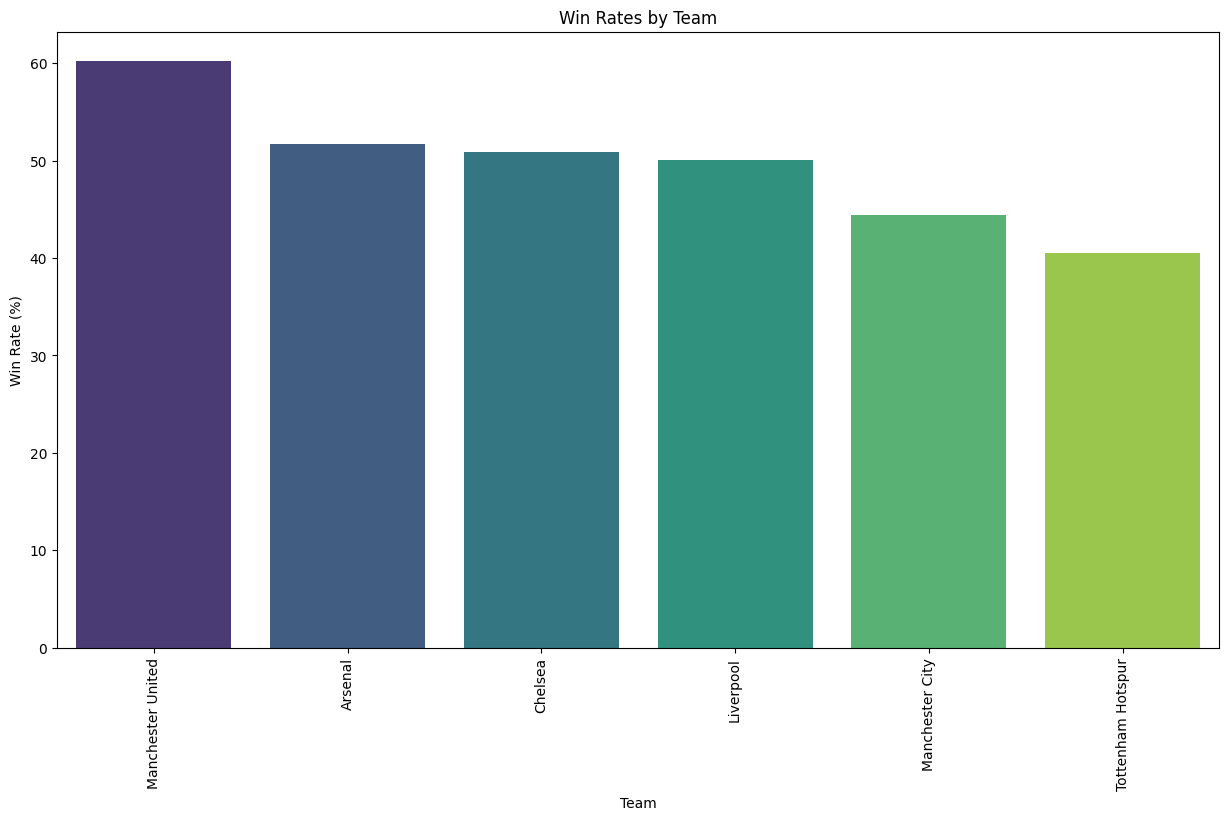

In [60]:
plt.figure(figsize=(15, 8))
sns.barplot(data=summary_rates_sorted, x='Team', y='Win_Rate', palette='viridis')
plt.xticks(rotation=90)
plt.title('Win Rates by Team')
plt.ylabel('Win Rate (%)')
plt.xlabel('Team')
plt.show()

In [61]:
big6_data

,Team,Matches,Wins,Draws,Losses,GoalsScored,GoalsConceded,GoalDifference,Points,Win_Rate,Loss_Rate,Draw_Rate
1,Arsenal,1076,556,306,214,1824.0,1017.0,807.0,1974,51.672862,19.888476,28.438662
13,Chelsea,1076,548,298,230,1754.0,1023.0,731.0,1942,50.929368,21.375465,27.695167
25,Liverpool,1076,539,293,244,1781.0,1037.0,744.0,1910,50.092937,22.676580,27.230483
26,Manchester City,886,394,228,264,1396.0,971.0,425.0,1410,44.469526,29.796840,25.733634
27,Manchester United,1076,648,259,169,2001.0,936.0,1065.0,2203,60.223048,15.706320,24.070632
44,Tottenham Hotspur,1076,436,298,342,1522.0,1327.0,195.0,1606,40.520446,31.784387,27.695167


In [62]:
gamma = 2
big6_data['Pythagorean_Win_Percentage'] = (
    big6_data['GoalsScored'] ** gamma /
    (big6_data['GoalsScored'] ** gamma + big6_data['GoalsConceded'] ** gamma)
) * 100  # %で表記

# 結果を表示
print(big6_data[['Team', 'Pythagorean_Win_Percentage']])

                 Team  Pythagorean_Win_Percentage
1             Arsenal                   76.284656
13            Chelsea                   74.617570
25          Liverpool                   74.681294
26    Manchester City                   67.394439
27  Manchester United                   82.047570
44  Tottenham Hotspur                   56.812592


<ipython-input-62-d4dac400901a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6_data['Pythagorean_Win_Percentage'] = (


In [63]:
Pythagorean_expectation = big6_data[['Team', 'Pythagorean_Win_Percentage']].sort_values(by='Pythagorean_Win_Percentage', ascending=False)
Pythagorean_expectation

,Team,Pythagorean_Win_Percentage
27,Manchester United,82.047570
1,Arsenal,76.284656
25,Liverpool,74.681294
13,Chelsea,74.617570
26,Manchester City,67.394439
44,Tottenham Hotspur,56.812592


In [64]:
Pythagorean_expectation.columns

Index(['Team', 'Pythagorean_Win_Percentage'], dtype='object')

<ipython-input-65-49da2ad9b849>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Pythagorean_expectation, x='Team', y='Pythagorean_Win_Percentage', palette='viridis')


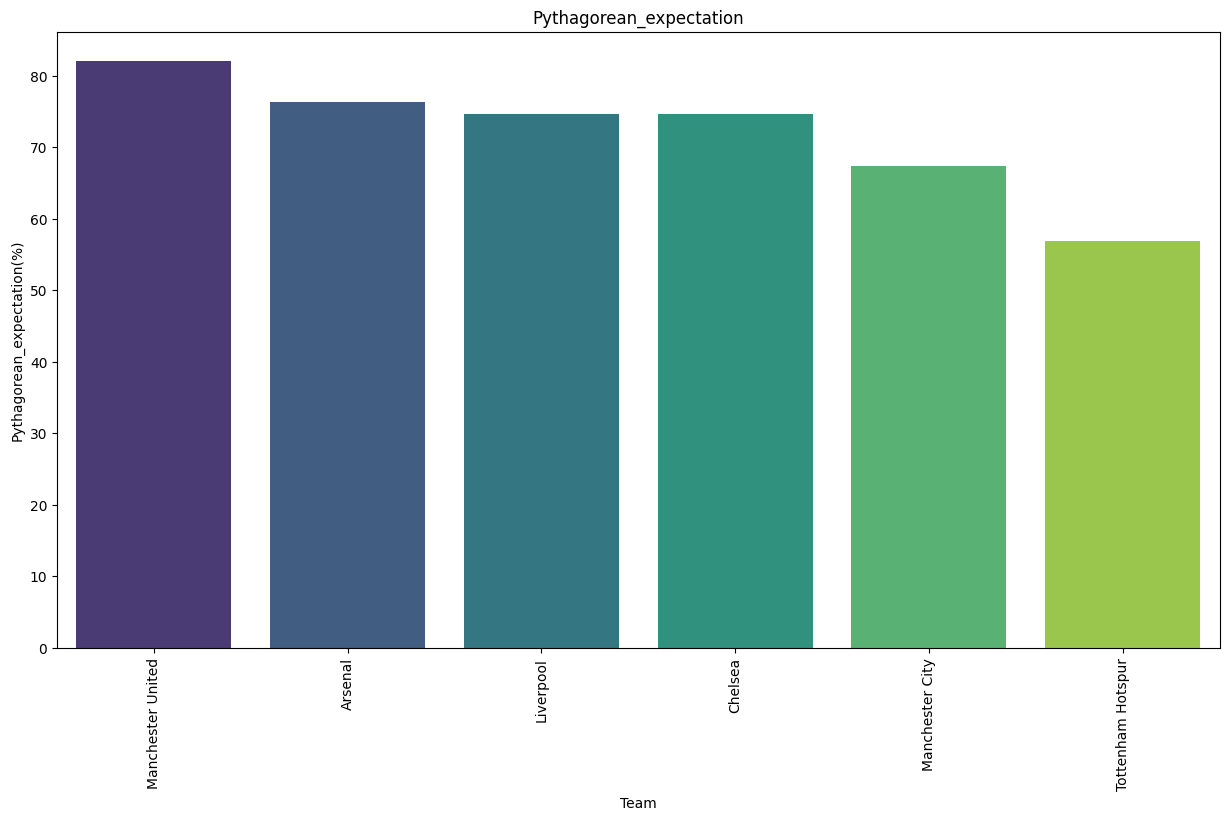

In [65]:
plt.figure(figsize=(15, 8))
sns.barplot(data=Pythagorean_expectation, x='Team', y='Pythagorean_Win_Percentage', palette='viridis')
plt.xticks(rotation=90)
plt.title('Pythagorean_expectation')
plt.ylabel('Pythagorean_expectation(%)')
plt.xlabel('Team')
plt.show()

In [68]:
big6_matches.columns

Index(['Round', 'Date', 'Team 1', 'FT', 'Team 2', 'Weekday', 'Month', 'Day',
       'Year', 'Team1_Score', 'Team2_Score'],
      dtype='object')

In [74]:
big6_matches['Date_Formatted'] = pd.to_datetime(
    big6_matches[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1), errors='coerce'
)
big6_matches

<ipython-input-74-a9a3aea4341b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big6_matches['Date_Formatted'] = pd.to_datetime(


,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score,Date_Formatted
32,3,Sun Aug 23 1992,Liverpool,0-2,Arsenal,Sun,Aug,23,1992,0.0,2.0,1992-08-23
68,7,Sat Sep 5 1992,Liverpool,2-1,Chelsea,Sat,Sep,5,1992,2.0,1.0,1992-09-05
92,9,Sat Sep 19 1992,Tottenham Hotspur,1-1,Manchester United,Sat,Sep,19,1992,1.0,1.0,1992-09-19
96,9,Sun Sep 20 1992,Manchester City,0-1,Chelsea,Sun,Sep,20,1992,0.0,1.0,1992-09-20
108,10,Mon Sep 28 1992,Arsenal,1-0,Manchester City,Mon,Sep,28,1992,1.0,0.0,1992-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...
10799,30,Sat Apr 03 2021,Arsenal,0–3,Liverpool,Sat,Apr,3,2021,NaN,NaN,2021-04-03
10812,31,Sun Apr 11 2021,Tottenham Hotspur,1–3,Manchester United,Sun,Apr,11,2021,NaN,NaN,2021-04-11
10845,34,Thu May 13 2021(P),Manchester United,2–4,Liverpool,Thu,May,13,2021(P),NaN,NaN,NaT
10849,35,Sat May 08 2021,Manchester City,1–2,Chelsea,Sat,May,8,2021,NaN,NaN,2021-05-08


In [75]:
# リバプールが関与する試合の抽出
liverpool_matches = big6_matches[
    (big6_matches['Team 1'] == 'Liverpool') | (big6_matches['Team 2'] == 'Liverpool')
]
liverpool_matches

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score,Date_Formatted
32,3,Sun Aug 23 1992,Liverpool,0-2,Arsenal,Sun,Aug,23,1992,0.0,2.0,1992-08-23
68,7,Sat Sep 5 1992,Liverpool,2-1,Chelsea,Sat,Sep,5,1992,2.0,1.0,1992-09-05
129,12,Sun Oct 18 1992,Manchester United,2-2,Liverpool,Sun,Oct,18,1992,2.0,2.0,1992-10-18
150,14,Sat Oct 31 1992,Tottenham Hotspur,2-0,Liverpool,Sat,Oct,31,1992,2.0,0.0,1992-10-31
237,22,Mon Dec 28 1992,Liverpool,1-1,Manchester City,Mon,Dec,28,1992,1.0,1.0,1992-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...
10705,20,Thu Jan 28 2021,Tottenham Hotspur,1–3,Liverpool,Thu,Jan,28,2021,NaN,NaN,2021-01-28
10733,23,Sun Feb 07 2021,Liverpool,1–4,Manchester City,Sun,Feb,7,2021,NaN,NaN,2021-02-07
10791,29,Thu Mar 04 2021,Liverpool,0–1,Chelsea,Thu,Mar,4,2021,NaN,NaN,2021-03-04
10799,30,Sat Apr 03 2021,Arsenal,0–3,Liverpool,Sat,Apr,3,2021,NaN,NaN,2021-04-03


得点

<ipython-input-76-aa3f8965857a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Liverpool_Score'] = liverpool_matches.apply(
<ipython-input-76-aa3f8965857a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Opponent_Score'] = liverpool_matches.apply(


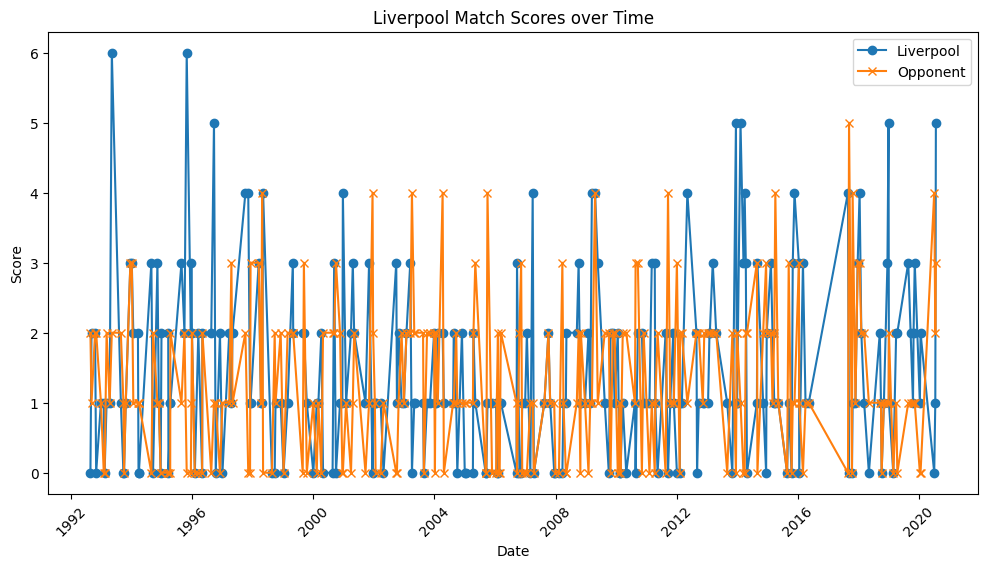

In [76]:
# スコア差（勝ち負けの表現）を計算する
liverpool_matches['Liverpool_Score'] = liverpool_matches.apply(
    lambda x: x['Team1_Score'] if x['Team 1'] == 'Liverpool' else x['Team2_Score'], axis=1
)
liverpool_matches['Opponent_Score'] = liverpool_matches.apply(
    lambda x: x['Team2_Score'] if x['Team 1'] == 'Liverpool' else x['Team1_Score'], axis=1
)

# 日付を基準にスコアの推移をプロット
plt.figure(figsize=(12, 6))
plt.plot(liverpool_matches['Date_Formatted'], liverpool_matches['Liverpool_Score'], marker='o', label='Liverpool')
plt.plot(liverpool_matches['Date_Formatted'], liverpool_matches['Opponent_Score'], marker='x', label='Opponent')

# グラフの装飾
plt.xticks(rotation=45)
plt.title('Liverpool Match Scores over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.show()


livapool VS Other team

<ipython-input-79-399d9cb23581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Liverpool_Points'] = liverpool_matches.apply(


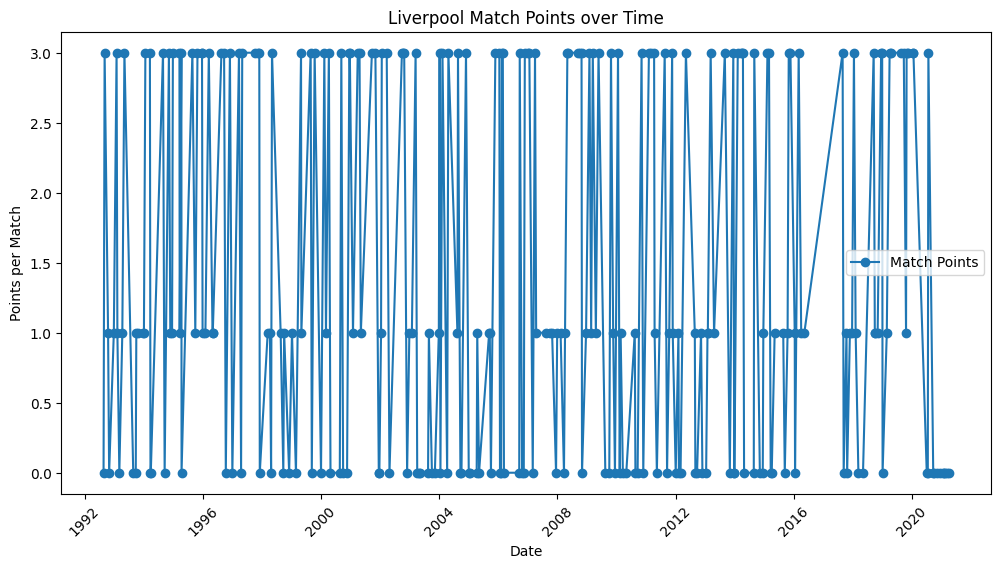

In [79]:
# リヴァプールの試合ごとの勝ち点を計算する
liverpool_matches['Liverpool_Points'] = liverpool_matches.apply(
    lambda x: 3 if x['Liverpool_Score'] > x['Opponent_Score'] else (1 if x['Liverpool_Score'] == x['Opponent_Score'] else 0),
    axis=1
)

# 日付を基準に勝ち点の推移をプロット
plt.figure(figsize=(12, 6))
plt.plot(liverpool_matches['Date_Formatted'], liverpool_matches['Liverpool_Points'], marker='o', label='Match Points')

# グラフの装飾
plt.xticks(rotation=45)
plt.title('Liverpool Match Points over Time')
plt.xlabel('Date')
plt.ylabel('Points per Match')
plt.legend()
plt.show()


In [85]:
liverpool_matches

,Round,Date,Team 1,FT,Team 2,Weekday,Month,Day,Year,Team1_Score,Team2_Score,Date_Formatted,Liverpool_Score,Opponent_Score,Liverpool_Points,Cumulative_Points,Opponent_Points
32,3,Sun Aug 23 1992,Liverpool,0-2,Arsenal,Sun,Aug,23,1992,0.0,2.0,1992-08-23,0.0,2.0,0,0,3
68,7,Sat Sep 5 1992,Liverpool,2-1,Chelsea,Sat,Sep,5,1992,2.0,1.0,1992-09-05,2.0,1.0,3,3,0
129,12,Sun Oct 18 1992,Manchester United,2-2,Liverpool,Sun,Oct,18,1992,2.0,2.0,1992-10-18,2.0,2.0,1,4,1
150,14,Sat Oct 31 1992,Tottenham Hotspur,2-0,Liverpool,Sat,Oct,31,1992,2.0,0.0,1992-10-31,0.0,2.0,0,4,3
237,22,Mon Dec 28 1992,Liverpool,1-1,Manchester City,Mon,Dec,28,1992,1.0,1.0,1992-12-28,1.0,1.0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,20,Thu Jan 28 2021,Tottenham Hotspur,1–3,Liverpool,Thu,Jan,28,2021,NaN,NaN,2021-01-28,NaN,NaN,0,372,0
10733,23,Sun Feb 07 2021,Liverpool,1–4,Manchester City,Sun,Feb,7,2021,NaN,NaN,2021-02-07,NaN,NaN,0,372,0
10791,29,Thu Mar 04 2021,Liverpool,0–1,Chelsea,Thu,Mar,4,2021,NaN,NaN,2021-03-04,NaN,NaN,0,372,0
10799,30,Sat Apr 03 2021,Arsenal,0–3,Liverpool,Sat,Apr,3,2021,NaN,NaN,2021-04-03,NaN,NaN,0,372,0


<ipython-input-86-069e9e4f8f58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Liverpool_Points'] = liverpool_matches.apply(
<ipython-input-86-069e9e4f8f58>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Opponent'] = liverpool_matches.apply(


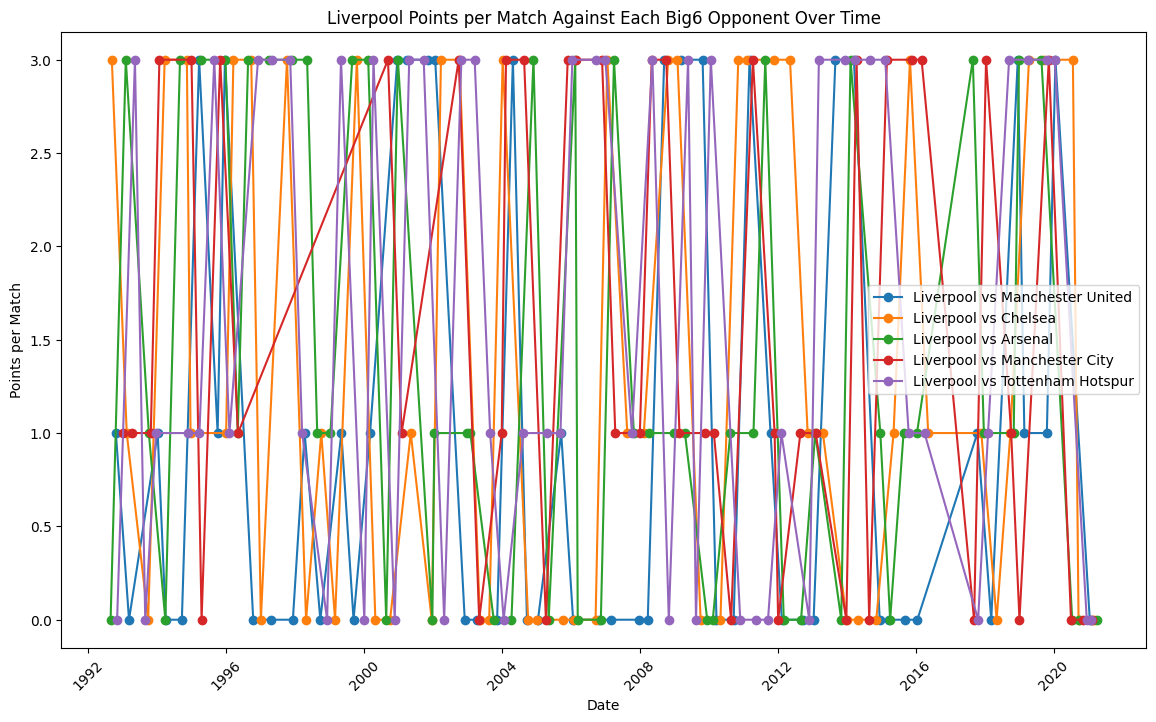

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# リヴァプールのビッグ6チームとの対戦リスト
opponents = ['Manchester United', 'Chelsea', 'Arsenal', 'Manchester City', 'Tottenham Hotspur']

# 勝ち点の計算
liverpool_matches['Liverpool_Points'] = liverpool_matches.apply(
    lambda x: 3 if x['Liverpool_Score'] > x['Opponent_Score'] else (1 if x['Liverpool_Score'] == x['Opponent_Score'] else 0),
    axis=1
)

# 対戦相手を特定
liverpool_matches['Opponent'] = liverpool_matches.apply(
    lambda x: x['Team 2'] if x['Team 1'] == 'Liverpool' else x['Team 1'],
    axis=1
)

# プロットの作成
plt.figure(figsize=(14, 8))
for opponent in opponents:
    # 対戦相手ごとにフィルタリング
    opponent_matches = liverpool_matches[liverpool_matches['Opponent'] == opponent]

    # リヴァプールの勝ち点をプロット
    plt.plot(opponent_matches['Date_Formatted'], opponent_matches['Liverpool_Points'], marker='o', label=f'Liverpool vs {opponent}')

# グラフの装飾
plt.xticks(rotation=45)
plt.title('Liverpool Points per Match Against Each Big6 Opponent Over Time')
plt.xlabel('Date')
plt.ylabel('Points per Match')
plt.legend()
plt.show()


<ipython-input-88-fbc8c4d69868>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Liverpool_Points'] = liverpool_matches.apply(
<ipython-input-88-fbc8c4d69868>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_matches['Opponent'] = liverpool_matches.apply(


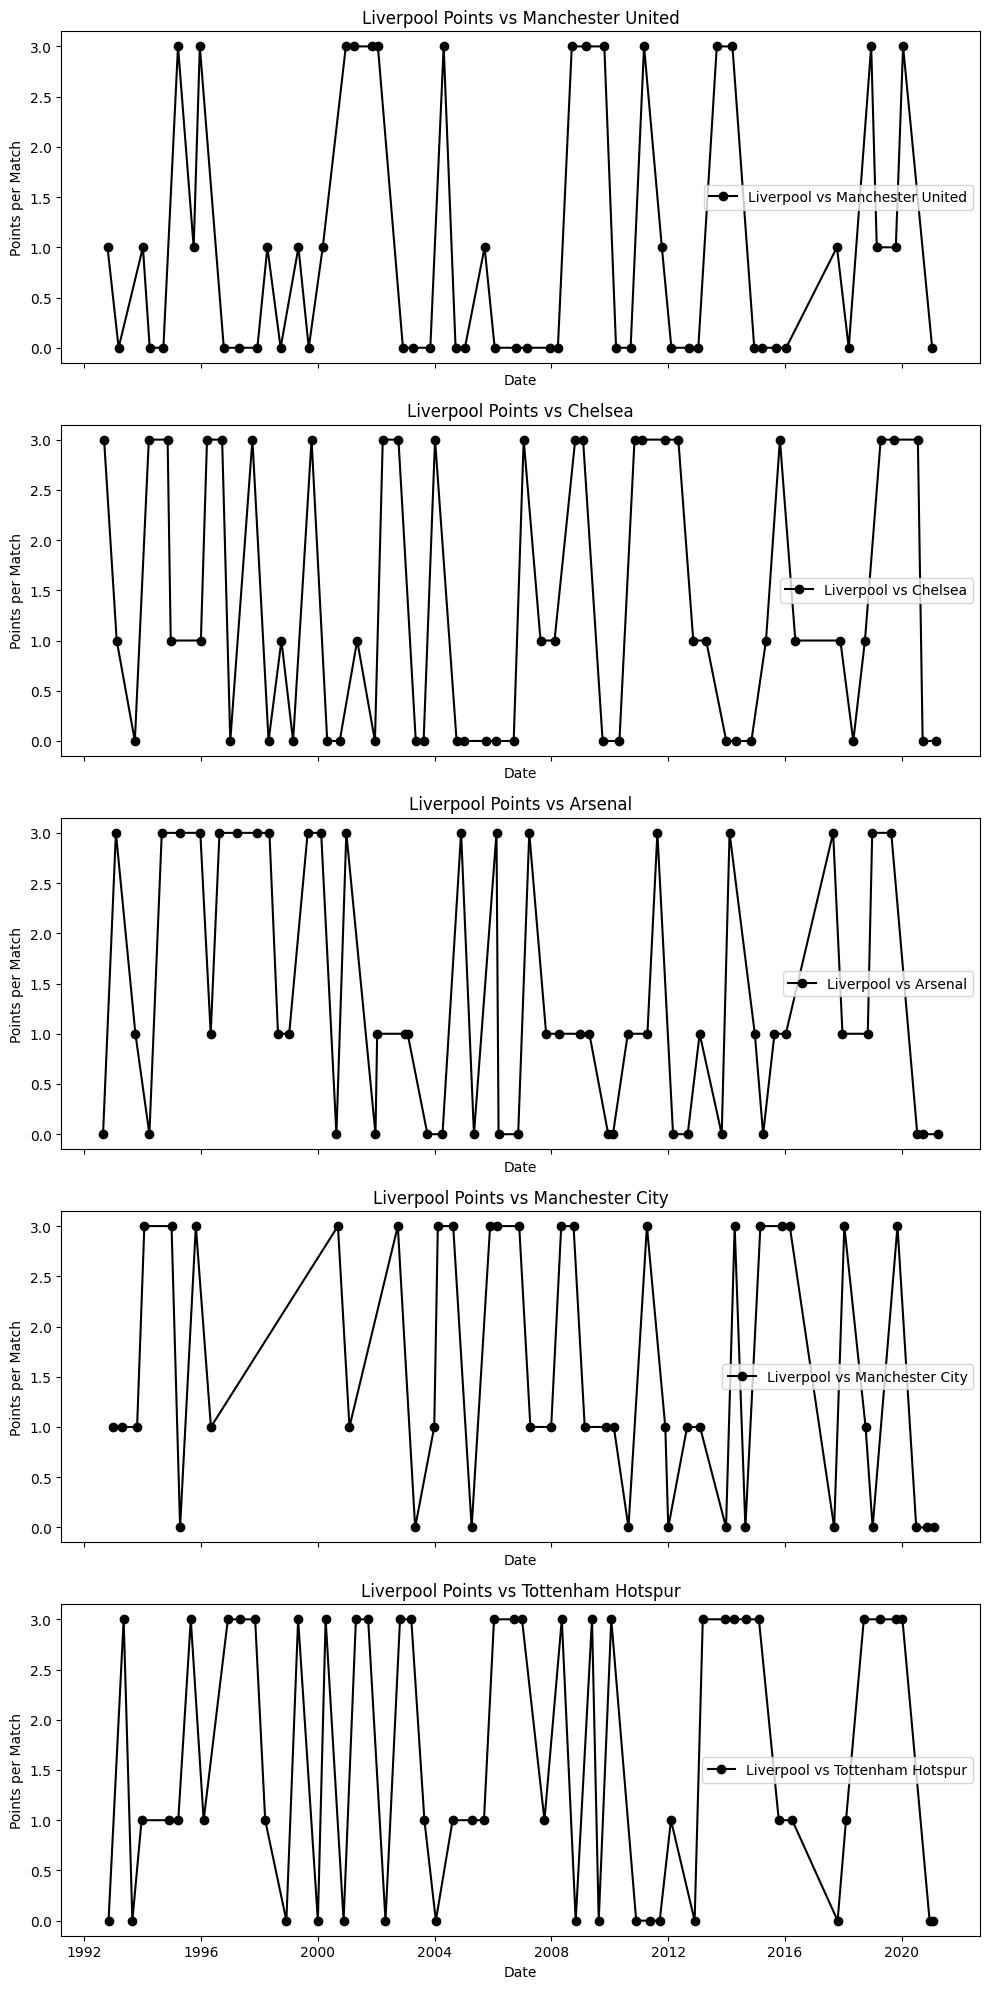

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# リヴァプールのビッグ6チームとの対戦リスト
opponents = ['Manchester United', 'Chelsea', 'Arsenal', 'Manchester City', 'Tottenham Hotspur']

# 勝ち点の計算
liverpool_matches['Liverpool_Points'] = liverpool_matches.apply(
    lambda x: 3 if x['Liverpool_Score'] > x['Opponent_Score'] else (1 if x['Liverpool_Score'] == x['Opponent_Score'] else 0),
    axis=1
)

# 対戦相手を特定
liverpool_matches['Opponent'] = liverpool_matches.apply(
    lambda x: x['Team 2'] if x['Team 1'] == 'Liverpool' else x['Team 1'],
    axis=1
)

# サブプロットの設定
fig, axes = plt.subplots(len(opponents), 1, figsize=(10, 20), sharex=True)

# 各対戦相手ごとにプロット
for i, opponent in enumerate(opponents):
    # 対戦相手ごとにフィルタリング
    opponent_matches = liverpool_matches[liverpool_matches['Opponent'] == opponent]

    # リヴァプールの勝ち点をプロット
    axes[i].plot(opponent_matches['Date_Formatted'], opponent_matches['Liverpool_Points'], marker='o', color='black', label=f'Liverpool vs {opponent}')

    # グラフの装飾
    axes[i].set_title(f'Liverpool Points vs {opponent}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Points per Match')
    axes[i].legend()

# 全体のレイアウトを調整
plt.tight_layout()
plt.show()
